<a href="https://colab.research.google.com/github/MarielGomezRan/G35.-Modulo-II-Modelos-Estad-sticos/blob/main/Tarea%202%3A%20Ley%20del%20experimento%20aleatorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#EQUIPO 4**
##INTEGRANTES:
* GÓMEZ RANGEL MARIEL
* JIMENEZ GARCÍA FABIOLA LIZETH
* MENESES HERNÁNDEZ JOSE GABRIEL
* PAREDES REYES CINDY ELIDEY
* ROBLES SÁNCHEZ TAHIRI


Cardinalidad de Ω: 100
Función de densidad: {5: 0.1, 4: 0.12, 1: 0.18, 0: 0.1, 6: 0.08, 3: 0.14, 2: 0.16, 8: 0.04, 7: 0.06, 9: 0.02}
Suma de las probabilidades: 1.0


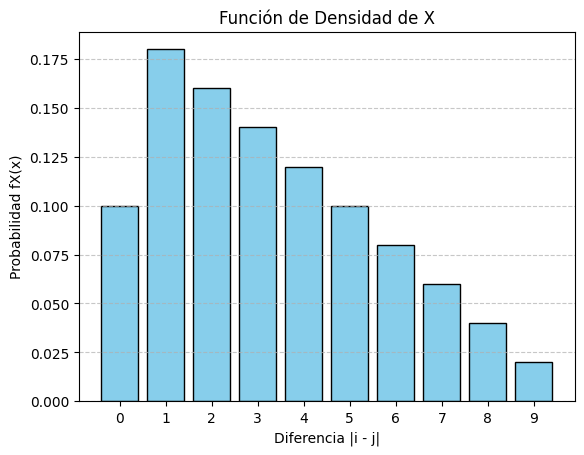

P(X ≥ 2) = 0.72


In [ ]:
# Importamos las librerías necesarias
from itertools import product
from collections import defaultdict
from fractions import Fraction
import pandas as pd
import matplotlib.pyplot as plt

# -------------------- 1. Definir el espacio muestral (Ω) --------------------
Omega = set(product(range(1, 11), repeat=2))  # Todas las combinaciones (i, j) con i, j ∈ {1, ..., 10}
card_Omega = len(Omega)  # Tamaño del espacio muestral

print(f"Cardinalidad de Ω: {card_Omega}")

# -------------------- 2. Definir la variable aleatoria X = |i - j| --------------------
X = {(i, j): abs(i - j) for i, j in Omega}  # Diccionario donde cada par (i, j) se asocia con |i - j|

# Agrupamos por valores de X
dX = defaultdict(set)
for (i, j), x in X.items():
    dX[x].add((i, j))

# -------------------- 3. Calcular las probabilidades asociadas --------------------
def P(A):
    return Fraction(len(A), card_Omega)  # Probabilidad como fracción

# Función de densidad fX(x)
fX = {x: P(A) for x, A in dX.items()}
fX_decimal = {x: float(p) for x, p in fX.items()}  # Convertimos a decimal

print(f"Función de densidad: {fX_decimal}")

# -------------------- 4. Verificar que ∑ fX(x) = 1 --------------------
suma_prob = sum(fX_decimal.values())
print(f"Suma de las probabilidades: {suma_prob}")

# -------------------- 5. Graficar la función de densidad --------------------
df_fX = pd.DataFrame(list(fX_decimal.items()), columns=['x', 'fX(x)']).sort_values(by='x')

plt.bar(df_fX['x'], df_fX['fX(x)'], color='skyblue', edgecolor='black')
plt.xlabel("Diferencia |i - j|")
plt.ylabel("Probabilidad fX(x)")
plt.title("Función de Densidad de X")
plt.xticks(range(10))  # Posibles valores de X
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# -------------------- 6. Calcular P(X ≥ 2) --------------------
P_X_mayor_igual_2 = sum(fX_decimal[x] for x in range(2, 10))
print(f"P(X ≥ 2) = {P_X_mayor_igual_2}")
